In [ ]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror{font-family:Consolas; font-size:17pt;}
div.output{font-size:17pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:17pt;}
div.prompt{min-width:70px;}
"""))

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width*height).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

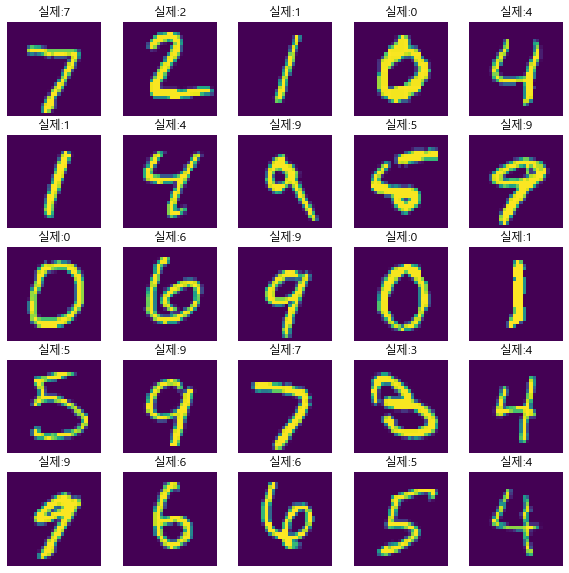

In [11]:
plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//5, i%5]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    sub_plt.set_title("실제:"+str(np.argmax(y_test[i])))

# 1. DNN(다중 퍼셉트론)

Epoch 1/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3892 - accuracy: 0.8813 - val_loss: 0.1252 - val_accuracy: 0.9623
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0956 - accuracy: 0.9695 - val_loss: 0.0872 - val_accuracy: 0.9730
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.0906 - val_accuracy: 0.9748
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0498 - accuracy: 0.9840 - val_loss: 0.1009 - val_accuracy: 0.9714
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.1028 - val_accuracy: 0.9720
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0944 - val_accuracy: 0.9779
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.1127 - val_accuracy:

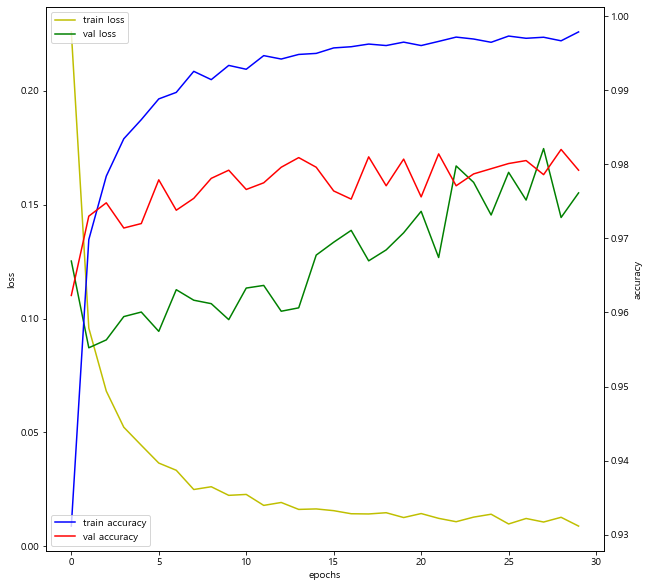

313/313 [==============================] - 0s 957us/step - loss: 0.1378 - accuracy: 0.9798


loss: 0.13779553771018982 ,metrics["accuracy"]: 0.9797999858856201


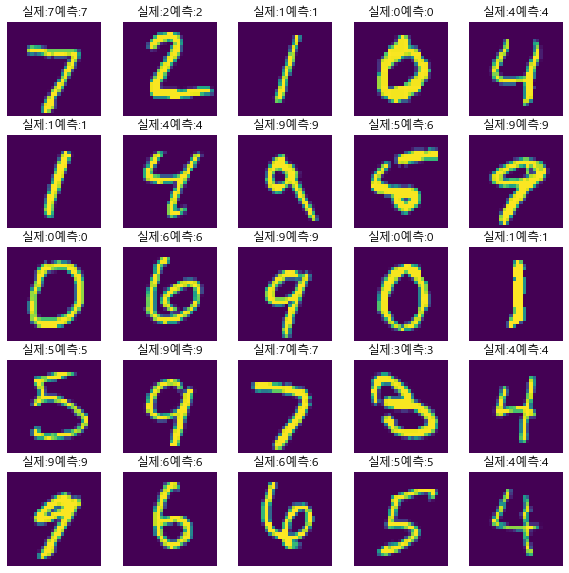

In [14]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width*height).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)

plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//5, i%5]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)

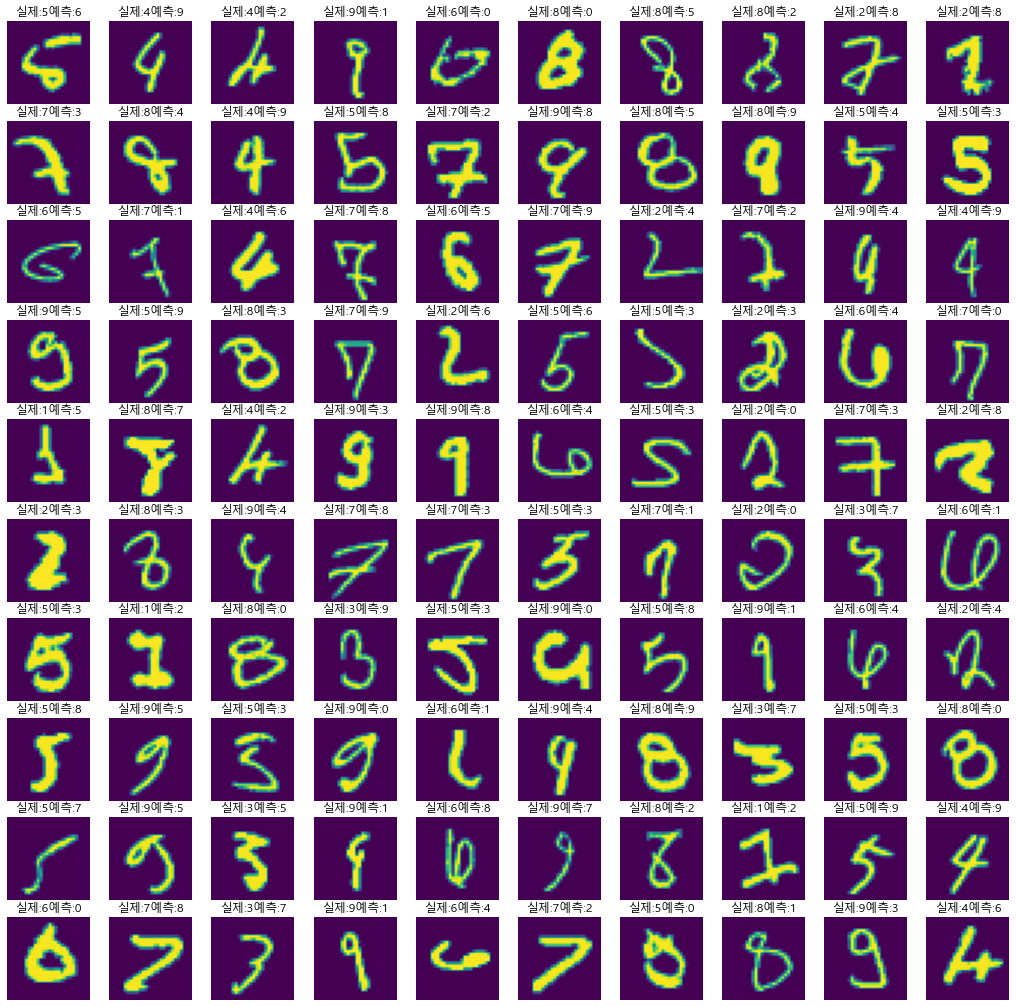

In [26]:
# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1

# 2. CNN(컨볼루션 레이어 -> 깊은 컨볼루션 레이어)

Epoch 1/30
1563/1563 [==============================] - 20s 12ms/step - loss: 0.3296 - accuracy: 0.9009 - val_loss: 0.0535 - val_accuracy: 0.9849
Epoch 2/30
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0503 - accuracy: 0.9842 - val_loss: 0.0531 - val_accuracy: 0.9835
Epoch 3/30
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0423 - val_accuracy: 0.9892
Epoch 4/30
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0368 - val_accuracy: 0.9890
Epoch 5/30
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0426 - val_accuracy: 0.9898
Epoch 6/30
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0396 - val_accuracy: 0.9898
Epoch 7/30
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.0422 -

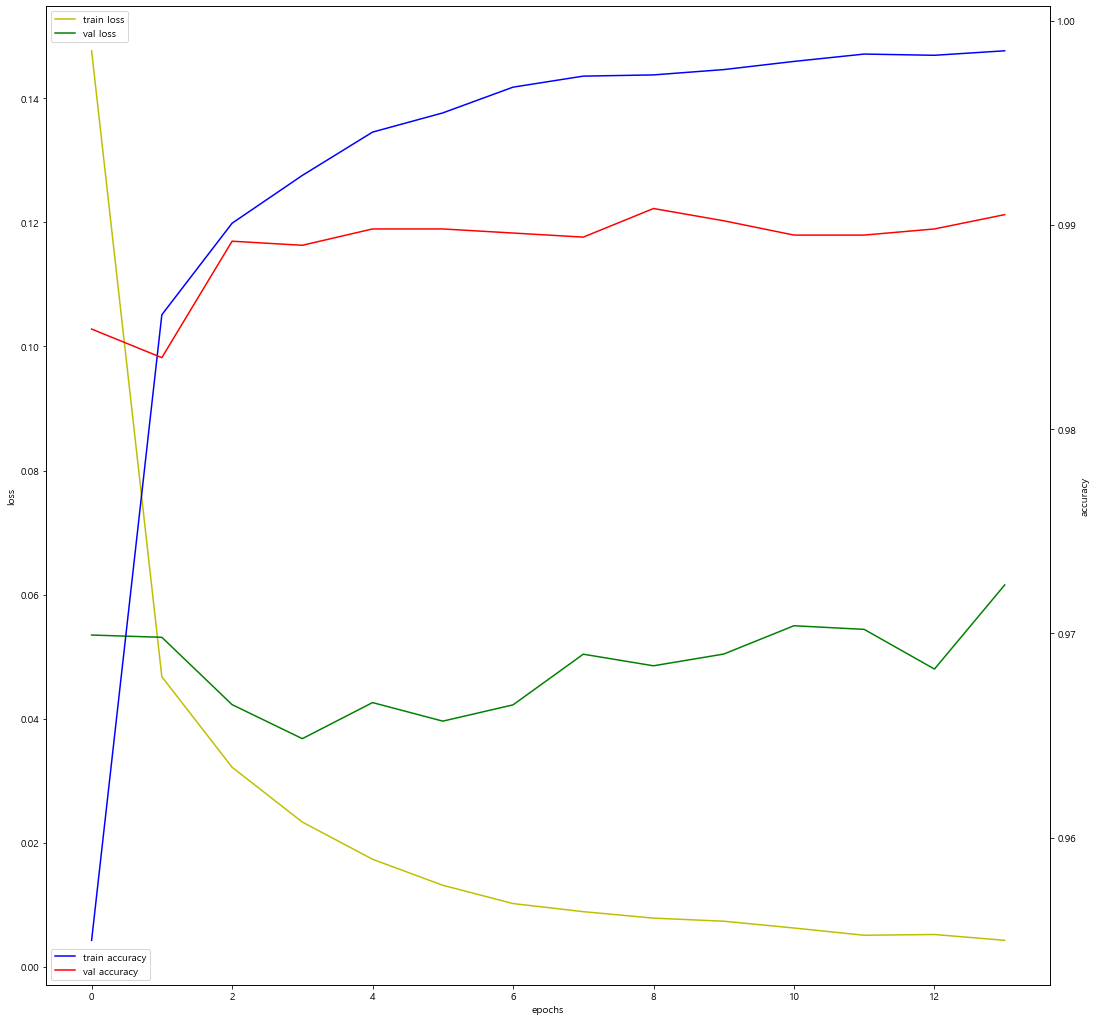

313/313 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9914


loss: 0.04637359455227852 ,metrics["accuracy"]: 0.9914000034332275


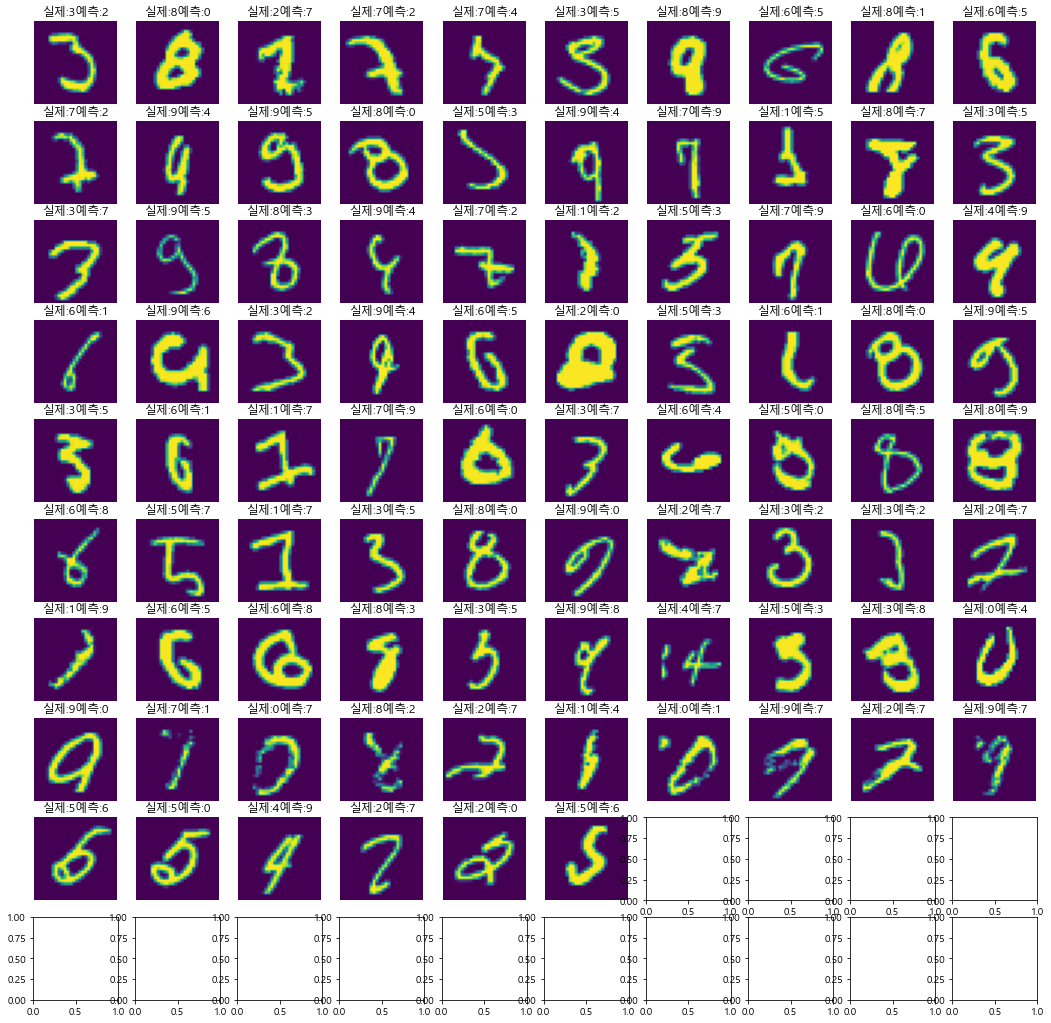

In [27]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(width, height, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while ( cnt < (plt_row*plt_col) ) and ( i<len(yhat) ):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1

Epoch 1/30
1563/1563 [==============================] - 63s 40ms/step - loss: 0.3355 - accuracy: 0.8951 - val_loss: 0.0472 - val_accuracy: 0.9870
Epoch 2/30
1563/1563 [==============================] - 64s 41ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0333 - val_accuracy: 0.9900
Epoch 3/30
1563/1563 [==============================] - 61s 39ms/step - loss: 0.0378 - accuracy: 0.9878 - val_loss: 0.0333 - val_accuracy: 0.9906
Epoch 4/30
1563/1563 [==============================] - 61s 39ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0276 - val_accuracy: 0.9930
Epoch 5/30
1563/1563 [==============================] - 61s 39ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0352 - val_accuracy: 0.9904
Epoch 6/30
1563/1563 [==============================] - 64s 41ms/step - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.0248 - val_accuracy: 0.9929
Epoch 7/30
1563/1563 [==============================] - 59s 38ms/step - loss: 0.0171 - accuracy: 0.9941 - val_loss: 0.0314 -

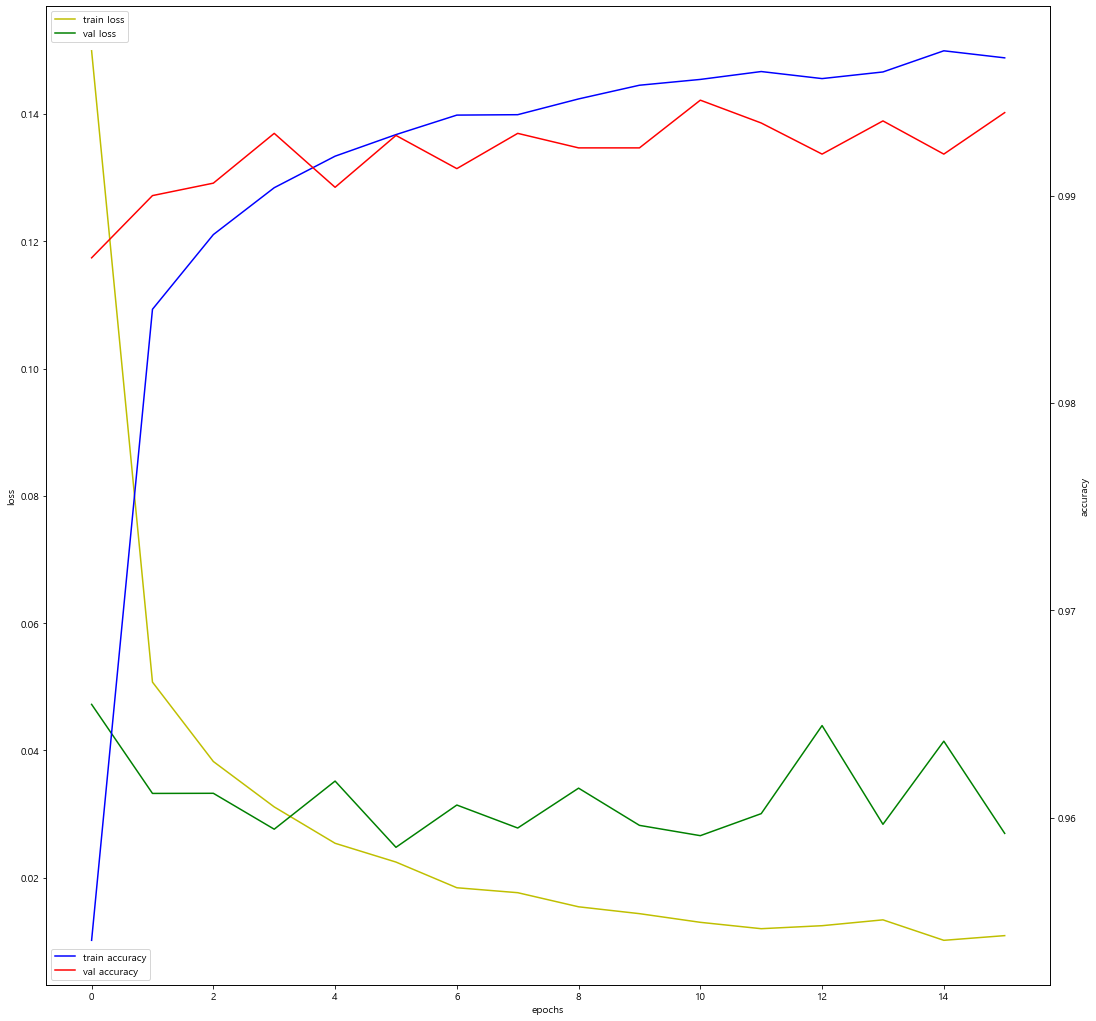

313/313 [==============================] - 2s 6ms/step - loss: 0.0280 - accuracy: 0.9933


loss: 0.027951903641223907 ,metrics["accuracy"]: 0.9933000206947327


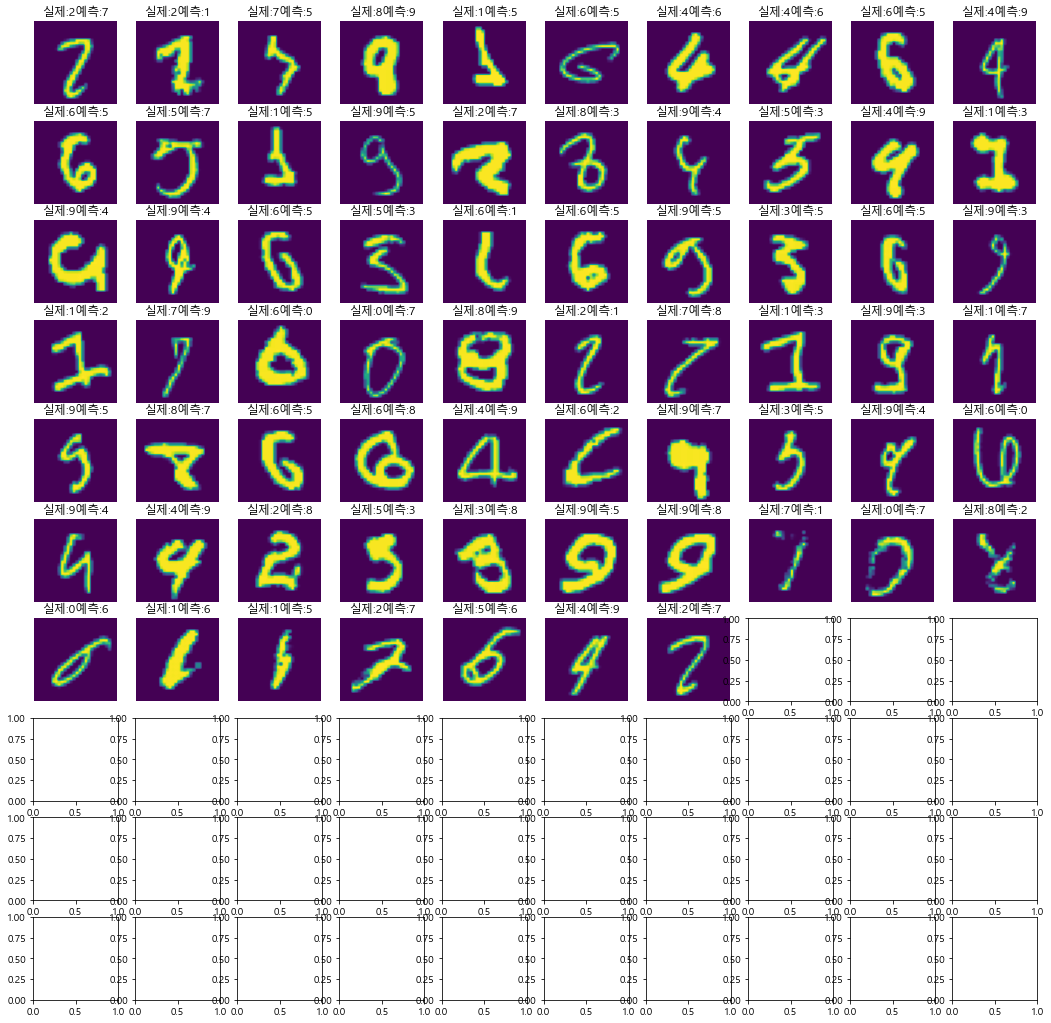

In [28]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(width, height, 1)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while ( cnt < (plt_row*plt_col) ) and ( i<len(yhat) ):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1